preprocess the dataset and hence classify the resultant data set using tree classification techniques. interpret the results.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np



In [2]:
# Load breast cancer dataset
breast_cancer = load_breast_cancer()
X_bc, y_bc = breast_cancer.data, breast_cancer.target



In [3]:
# Normalize the data
scaler = StandardScaler()
X_bc_normalized = scaler.fit_transform(X_bc)



In [4]:
# Generate moon-shaped dataset from breast cancer dataset
moon_X = []
moon_y = []
for i in range(len(X_bc_normalized)):
    # Create moon-shaped distribution using breast cancer data
    noise_factor = np.random.uniform(0, 0.1)
    if y_bc[i] == 0:
        moon_X.append([X_bc_normalized[i][0] - noise_factor, X_bc_normalized[i][1] + noise_factor])
        moon_y.append(0)
    else:
        moon_X.append([X_bc_normalized[i][0] + noise_factor, X_bc_normalized[i][1] - noise_factor])
        moon_y.append(1)

moon_X = np.array(moon_X)
moon_y = np.array(moon_y)



In [5]:
# Splitting the moon-shaped dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(moon_X, moon_y, test_size=0.2, random_state=42)



In [6]:
# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)



In [7]:
# Train the classifier
clf.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [8]:
# Predict on the test set
y_pred = clf.predict(X_test)



In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8157894736842105


Let's visualize the decision boundary and interpret the decision tree structure:

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [11]:
# Plot decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')



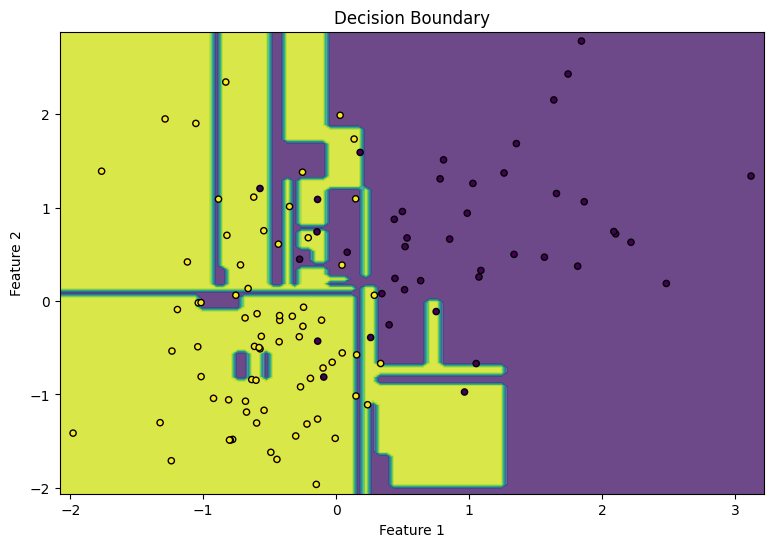

In [14]:
# Plot decision boundary with data points
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(clf, X_test, y_test)



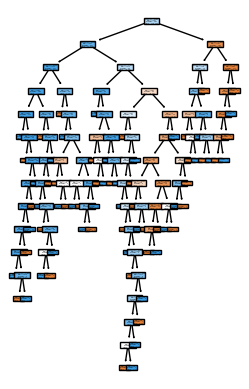

In [15]:
# Plot decision tree
plt.subplot(1, 2, 2)
plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"])
plt.show()